##  1 作业一

用多维线性回归方法确定影响幸福指数的因素。   （幸福分数作为y，去掉国家和名词，九维（都是一次方来考虑）

Tips: 按x删除， v添加， m为标记

# 1.1 多维线性回归: 影响幸福指数的因素

In [252]:
import pandas as pd  # 导入库
import numpy as np
from pylab import plot, xlabel, ylabel, legend
%matplotlib inline     
#上行具体作用：当调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候，可以直接在python console里面生成图像。
import matplotlib # 注意这个也要import一次,原因不是很清楚
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 使用Matplotlib的字体管理器加载中文字体
my_font=fm.FontProperties(fname="C:\Windows\Fonts\simsunb.ttf")
plt.rcParams['font.sans-serif']=['SimHei']

#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False


In [253]:
df_happy = pd.read_csv("2017Happy.csv")      #提取幸福指数
df_happy
#可以看出，显然第四项和第五项求平均等于第三项，所以应该去除这个指数

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


在drop函数后面用shift+tab可以查看函数的参数明细，如下：

默认参数axis=0，表示对行进行操作，如需对列进行操作需要更改默认参数为axis=1，

默认参数inplace=False，表示该删除操作不改变原数据，而是返回一个执行删除操作后的新dataframe，如需直接在原数据上进行删除操作，需要更改默认参数为inplace=True

df1.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')


In [254]:
df = df_happy.drop(["Whisker.high","Whisker.low","Country"],axis=1)

In [255]:
df

,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,10,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [256]:
a=df_happy[df_happy.columns[-1:]]
a
#这里说明-1是第二列，空行才是最后一列

,Dystopia.Residual
0,2.277027
1,2.313707
2,2.322715
3,2.276716
4,2.430182
5,2.294804
6,2.187264
7,2.046456
8,2.097538
9,2.065211


## 1.2 数据归一化（标准化）

一般机器学习算法要求所有特征的数值范围大体相同。因此在训练前要将特征归一化。`sklearn`库中的[`preprocessing`](https://scikit-learn.org/stable/modules/preprocessing.html)包含很多归一化函数。这里用 `scale`。它将每个特征的数值都变换成均值为 $0$,方差为 $1$的数。

In [257]:
from sklearn import preprocessing

In [258]:
df_x = df[df.columns[2:]]
df_x.insert(0,"X^0", df_x.shape[1])

x = df_x.values                  #是数据从csv变成array
X = preprocessing.scale(x)       #使数据归一化
X.shape

(155, 8)

In [259]:
y = df[df.columns[1:2]]
m = X.shape[-1]

In [260]:
def NormalEquation(X,Y):
    """
    线性模型的 Normal Equation    
    """
    C=np.dot(X.T,X)    #矩阵乘法
    B=np.linalg.pinv(C)     #（求逆高维容易出问题(出问题就是跑不出来，而可以改成伪逆，pinv， 就会好很多）
    D=np.dot(B,X.T)    #矩阵乘法
    return np.dot(D,Y)      #输出上式Θ

m = X.shape[-1]
n = X.shape[1]-1          #通过得到矩阵列数确定有多少个未知变量，-1是因为第一列为常数
Theta_prediction = NormalEquation(X,y)
Y_prediction = np.dot(X,Theta_prediction)    #得到预测值
J = np.dot((np.dot(X,Theta_prediction)-y).T,np.dot(X,Theta_prediction)-y)/2/m       #算平方误差

[reshape的使用](https://blog.csdn.net/wld914674505/article/details/80460042)

loss function: 277.6972573520893


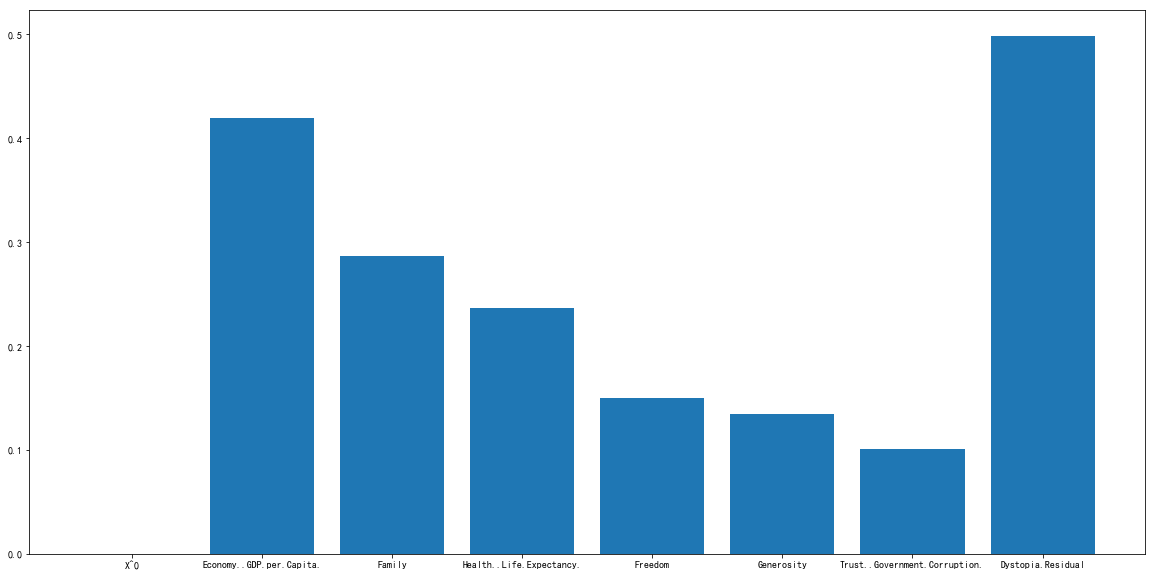

In [261]:
print("loss function:",J.item())    #.item是为了从二维向量中直接提取数值
A = df_x.columns[:]
plt.figure(figsize=(20,10))
fig1 = plt.bar(A,Theta_prediction.reshape(-1));    #-1是为了变成单列表        

In [263]:
Theta_prediction.reshape(-1)

array([0.        , 0.41947015, 0.28630745, 0.23628961, 0.14951597,
       0.13437155, 0.10130707, 0.49839007])

通过图标可以很容易的观测到影响幸福指数最大的恐袭的指标，在幸福指数函数中影响的权重最大。 

另外还有一件有趣的现象，就是之前的误差值非常大，考虑到可能是将后面的多元数据归一化了，但是输出值没有归一化，即幸福指数没有归一化的结果，而事实上恰恰如此，去掉归一化后可以观测到误差非常小，而且确实每个指标的系数为1，即幸福指数就是人均GDP，家庭，健康，自由，宽宏，政府腐败度，恐袭各指标求和所得的分数

同时此时是先加了X0次方项再归一化，也是产生误差的原因，从下面的讨论也可以看出

loss function: 7.584616515651863e-07


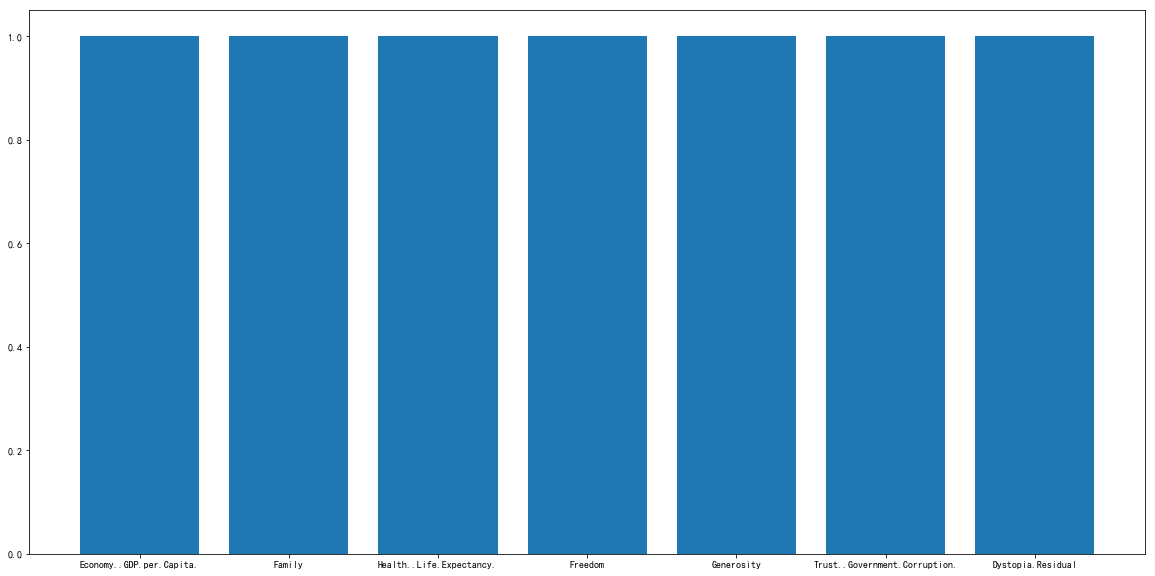

In [47]:
df_x = df[df.columns[2:]]
x = df_x.values                  #是数据从csv变成array
#X = preprocessing.scale(x)       #使数据归一化
X = x
Y = df[df.columns[1:2]]
n = X.shape[1]-1          #通过得到矩阵列数确定有多少个未知变量，-1是因为第一列为常数
Theta_prediction = NormalEquation(X,y)
Y_prediction = np.dot(X,Theta_prediction)    #得到预测值
J = np.dot((np.dot(X,Theta_prediction)-y).T,np.dot(X,Theta_prediction)-y)/2/m       #算平方误差
print("loss function:",J.item())    #.item是为了从二维向量中直接提取数值
A = df_x.columns[:]
plt.figure(figsize=(20,10))
fig2 = plt.bar(A,Theta_prediction.reshape(-1));  

loss function: 7.514464948720632e-07


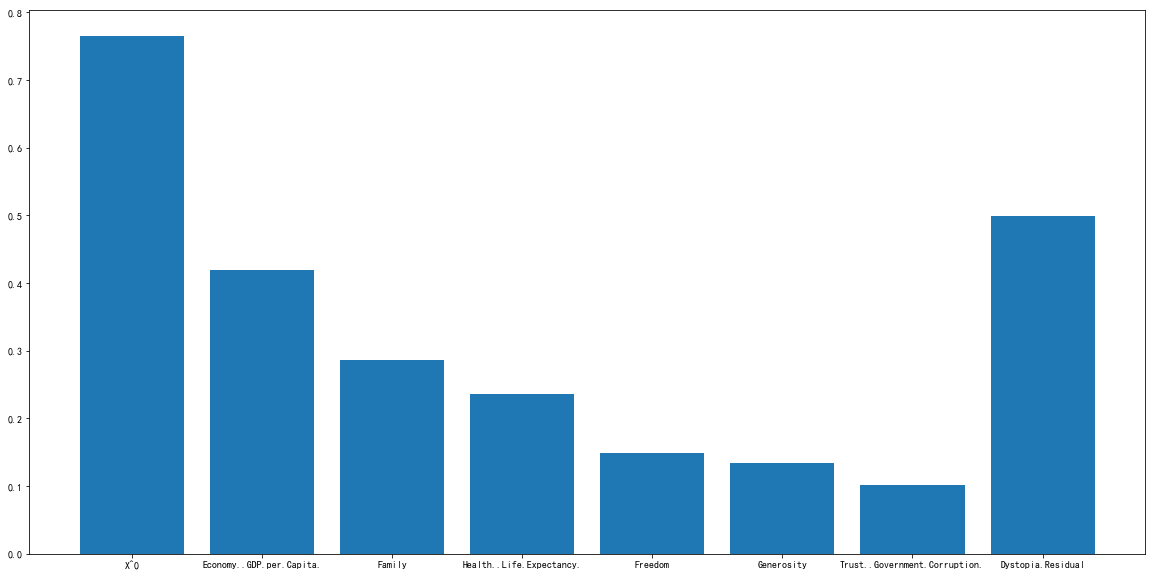

In [48]:
#然后探究使数据归一化，然后再补上常数项：
df_ = df[df.columns[1:]]
dff = preprocessing.scale(df_)       #使数据归一化
x = dff[:,1:]
X = np.insert(x,0,values=df_x.shape[1],axis=1)
Y = dff[:,0:1]
n = X.shape[1]-1          #通过得到矩阵列数确定有多少个未知变量，-1是因为第一列为常数
Theta_prediction = NormalEquation(X,y)
Y_prediction = np.dot(X,Theta_prediction)    #得到预测值
J = np.dot((np.dot(X,Theta_prediction)-y).T,np.dot(X,Theta_prediction)-y)/2/m       #算平方误差
print("loss function:",J.item())    #.item是为了从二维向量中直接提取数值
df_x.insert(0,"X^0", df_x.shape[1])
A = df_x.columns[:]
plt.figure(figsize=(20,10))
fig2 = plt.bar(A,Theta_prediction.reshape(-1));  

虽然此时系数还是不太对，但是误差下降到了一个可以接受的范围内了，说明之前出现那么大的误差是因为没有同时归一化输入输出值。

In [57]:
A

Index(['X^0', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

loss function: 277.85492523029137


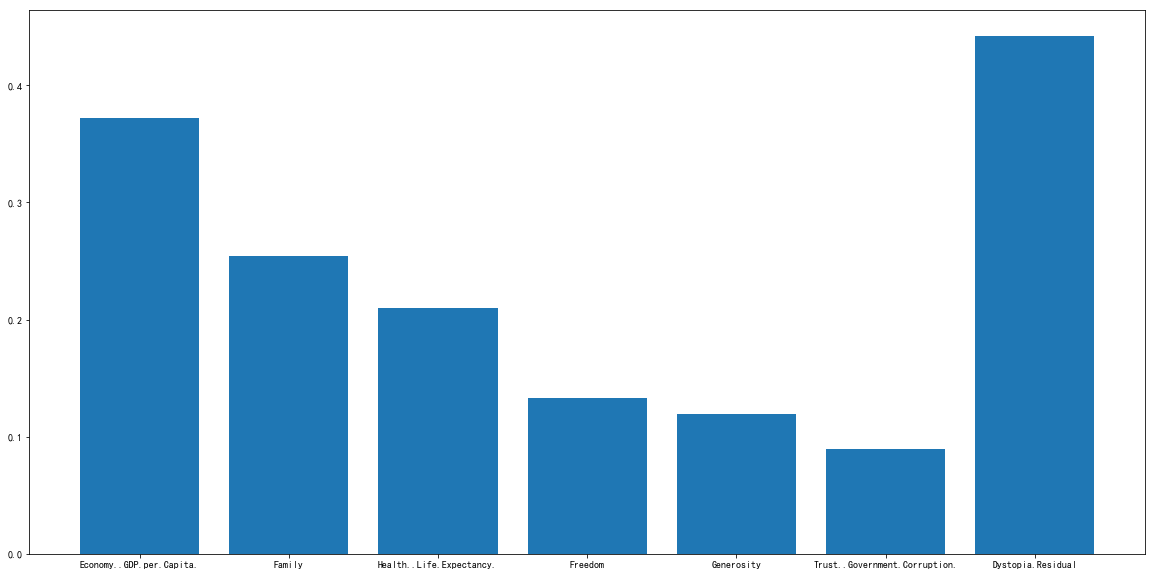

In [58]:
#考虑不加θ_0, 即不加常数
df_ = df[df.columns[1:]]
dff = preprocessing.scale(df_)       #使数据归一化
x = dff[:,1:]
Y = dff[:,0:1]
n = X.shape[1]-1          #通过得到矩阵列数确定有多少个未知变量，-1是因为第一列为常数
Theta_prediction = NormalEquation(x,Y)
Y_prediction = np.dot(x,Theta_prediction)    #得到预测值
J = np.dot((np.dot(x,Theta_prediction)-y).T,np.dot(x,Theta_prediction)-y)/2/m       #算平方误差
print("loss function:",J.item())    #.item是为了从二维向量中直接提取数值
A = df_x.columns[1:]
plt.figure(figsize=(20,10))
fig2 = plt.bar(A,Theta_prediction.reshape(-1));  

说明必须有X0项，但是为什么会有这样的差异还不是很清楚

然后探究归一化的方法的区别，之前使用的是标准化，接下来使用Normalization

## 1.3 Normalization

loss function: 7.514464948719996e-07


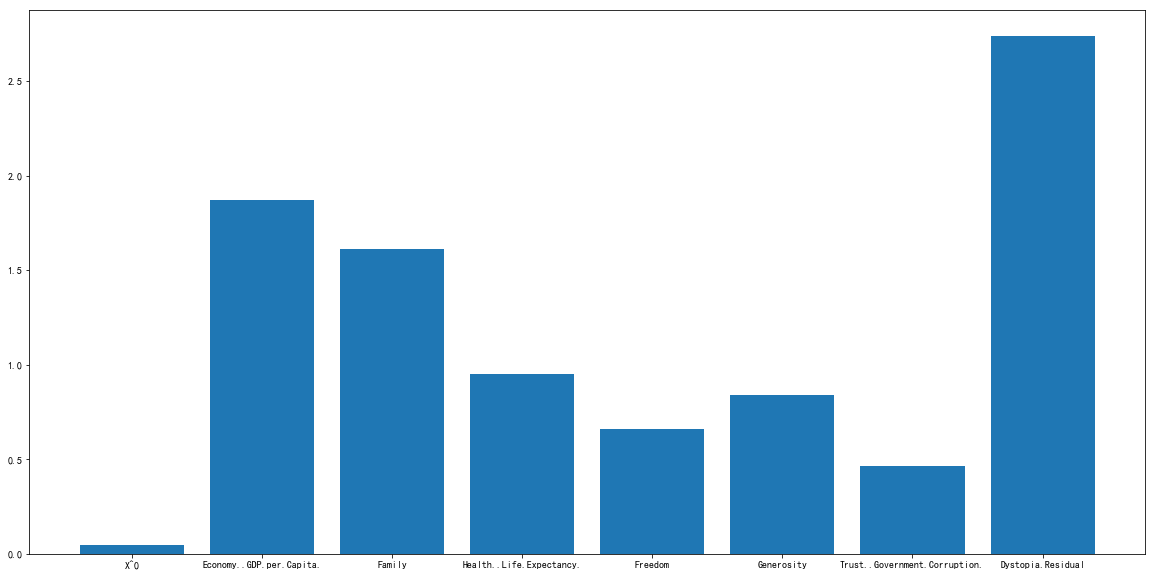

In [59]:
#然后探究使数据归一化，然后再补上常数项：
from sklearn import preprocessing
df_ = df[df.columns[1:]]
min_max_scaler = preprocessing.MinMaxScaler()    #引出数据归一化
dff = min_max_scaler.fit_transform(df_)       #使数据归一化
x = dff[:,1:]
X = np.insert(x,0,values=df_x.shape[1],axis=1)      #进行插值
Y = dff[:,0:1]
n = X.shape[1]-1          #通过得到矩阵列数确定有多少个未知变量，-1是因为第一列为常数
Theta_prediction = NormalEquation(X,y)
Y_prediction = np.dot(X,Theta_prediction)    #得到预测值
J = np.dot((np.dot(X,Theta_prediction)-y).T,np.dot(X,Theta_prediction)-y)/2/m       #算平方误差
print("loss function:",J.item())    #.item是为了从二维向量中直接提取数值
A = df_x.columns[:]
plt.figure(figsize=(20,10))
fig2 = plt.bar(A,Theta_prediction.reshape(-1));  

可以看到，依旧是最后一个的权重最大，但是Generosity的相对排名发生了变化，其实这里产生了疑惑，其实每个θ的系数应该为1，那么应该每个分数对总分数的贡献的权重应当是相等的，那么归一化的结果为什么会是这样呢，实际上应该是改变乐基本值，这种归一化的方法使得所有打分的0分不在是客观的0分，而变成了最低分为0分，这种缩放不再是同系数的等比例缩放，所以会对结果跑出来的系数发生难以预料的变化。

所以这道题的权重还是应该做最初的处理，就是不归一化，即每一个系数都为1，每一个结果的权重都是相等的。

In [18]:
dff

MinMaxScaler(copy=True,
       feature_range=array([[7.537  , 1.61646, ..., 0.31596, 2.27703],
       [7.522  , 1.48238, ..., 0.40077, 2.31371],
       ...,
       [2.905  , 0.09162, ..., 0.08415, 1.68302],
       [2.693  , 0.     , ..., 0.05657, 2.066  ]]))

In [15]:
df_

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,7.284,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


#### 随便跑下各参量与幸福指数的散点图

Text(0, 0.5, 'Happiness.Score')

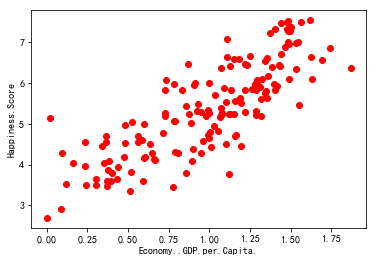

In [70]:
x_happy = df_happy["Economy..GDP.per.Capita."]
Y_happy = df_happy["Happiness.Score"]
plt.plot(x_happy,Y_happy,"ro")
plt.xlabel('Economy..GDP.per.Capita.')
plt.ylabel('Happiness.Score')

Text(0, 0.5, 'Happiness.Score')

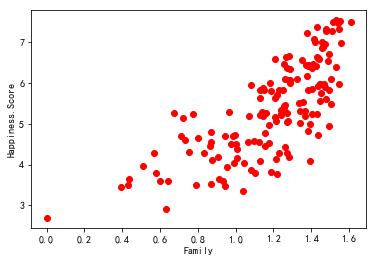

In [89]:
x_happy = df_happy[df.columns[3:4]]
Y_happy = df_happy["Happiness.Score"]
plt.plot(x_happy,Y_happy,"ro")
plt.xlabel(df.columns[3:4].item())                    #.item()是为了提取Key
plt.ylabel('Happiness.Score')

Text(0, 0.5, 'Happiness.Score')

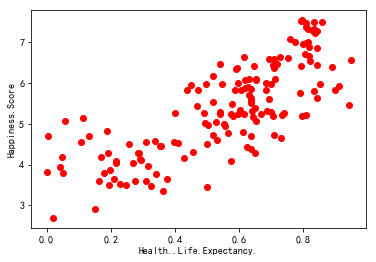

In [90]:
l = 4
x_happy = df_happy[df.columns[l:l+1]]
Y_happy = df_happy["Happiness.Score"]
plt.plot(x_happy,Y_happy,"ro")
plt.xlabel(df.columns[l:l+1].item())                    #.item()是为了提取Key
plt.ylabel('Happiness.Score')

Text(0, 0.5, 'Happiness.Score')

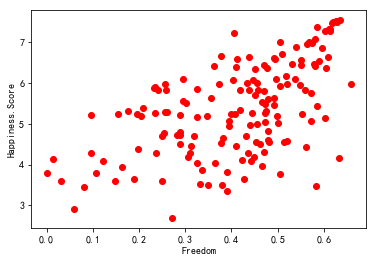

In [91]:
l = 5
x_happy = df_happy[df.columns[l:l+1]]
Y_happy = df_happy["Happiness.Score"]
plt.plot(x_happy,Y_happy,"ro")
plt.xlabel(df.columns[l:l+1].item())                    #.item()是为了提取Key
plt.ylabel('Happiness.Score')

Text(0, 0.5, 'Happiness.Score')

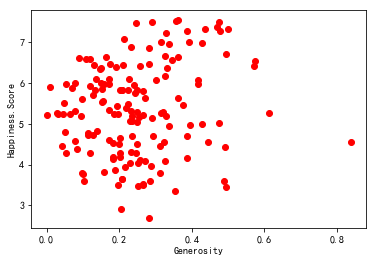

In [92]:
l = 6
x_happy = df_happy[df.columns[l:l+1]]
Y_happy = df_happy["Happiness.Score"]
plt.plot(x_happy,Y_happy,"ro")
plt.xlabel(df.columns[l:l+1].item())                    #.item()是为了提取Key
plt.ylabel('Happiness.Score')

Text(0, 0.5, 'Happiness.Score')

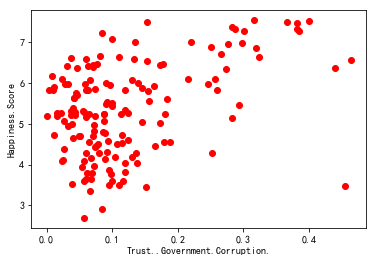

In [93]:
l = 7
x_happy = df_happy[df.columns[l:l+1]]
Y_happy = df_happy["Happiness.Score"]
plt.plot(x_happy,Y_happy,"ro")
plt.xlabel(df.columns[l:l+1].item())                    #.item()是为了提取Key
plt.ylabel('Happiness.Score')

Text(0, 0.5, 'Happiness.Score')

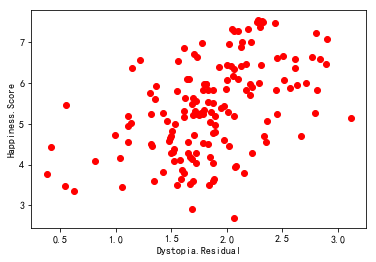

In [94]:
l = 8
x_happy = df_happy[df.columns[l:l+1]]
Y_happy = df_happy["Happiness.Score"]
plt.plot(x_happy,Y_happy,"ro")
plt.xlabel(df.columns[l:l+1].item())                    #.item()是为了提取Key
plt.ylabel('Happiness.Score')

# 2 梯度下降法，lost function 训练误差到0.1

用$ sinc = \frac{\sin ax}{ax}$ 生成扰动的训练集和验证集，确定最优特征数 n.(提示：可以固定训练误差）

## 2.1 生成扰动训练集与交叉验证集

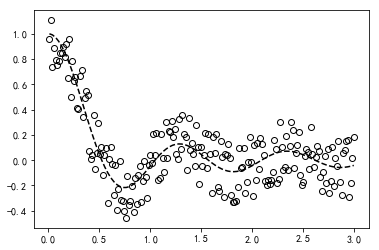

In [160]:
def tureFunction(x,a=6): 
    return np.sin(a*x)/(a*x)
    #return sinc(a*x)
m=200 # 样本数

# 固定训练集
np.random.seed(1)      #(每次计算会有相同的样本，前提是编号1相对应)

rs = 0.5 # 扰动强度

random_perturbation_training = rs*(np.random.rand(m,1)-0.5)      #生成m维的扰动矩阵

x_training = np.linspace(0.01,3,m).reshape(m,1)      #改为M*1的矩阵（就是两个括号）

Y_training = tureFunction(x_training) + random_perturbation_training
x1=np.linspace(0.01,3,100)
y1=tureFunction(x1)
plt.plot(x1,y1,'k--');
plt.plot(x_training,Y_training,'ko',markerfacecolor='none');

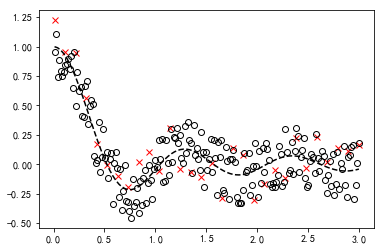

In [157]:
# 生成交叉验证集

m_cv=30 # 样本数

# 固定训练集

x_cv =np.linspace(0.01,3,m_cv).reshape(m_cv,1)

random_perturbation_cv = rs*(np.random.rand(m_cv,1)-0.5)

Y_cv= tureFunction(x_cv) + random_perturbation_cv

plt.plot(x_cv,Y_cv,'rx');
plt.plot(x1,y1,'k--');
plt.plot(x_training,Y_training,'ko',markerfacecolor='none');

## 2.2 利用panda的方法得到FeatureMapping

In [161]:
# 从 np.array 构造 DataFrame 数据库
df = pd.DataFrame(x_training,columns=["X-name"])      #将x导入到表格内  “X“名字
df["X^2"]=x_training*x_training    #增加一列，叫X^2， 结果是T（数组对应位置相乘地添加一列）      直接添加用等于就完事了
df["X^3"]=x_training*x_training*x_training
df["X^4"]=x_training*x_training*x_training*x_training
df["X^5"]=x_training*x_training*x_training*x_training*x_training
df["Y"] = Y_training

In [162]:
df

,X-name,X^2,X^3,X^4,X^5,Y
0,0.010000,0.000100,0.000001,1.000000e-08,1.000000e-10,0.957911
1,0.025025,0.000626,0.000016,3.921977e-07,9.814797e-09,1.106409
2,0.040050,0.001604,0.000064,2.572889e-06,1.030448e-07,0.740461
3,0.055075,0.003033,0.000167,9.200892e-06,5.067426e-07,0.883066
4,0.070101,0.004914,0.000344,2.414819e-05,1.692800e-06,0.794153
5,0.085126,0.007246,0.000617,5.250992e-05,4.469940e-06,0.753255
6,0.100151,0.010030,0.001005,1.006044e-04,1.007560e-05,0.784026
7,0.115176,0.013265,0.001528,1.759730e-04,2.026785e-05,0.845067
8,0.130201,0.016952,0.002207,2.873805e-04,3.741723e-05,0.849729
9,0.145226,0.021091,0.003063,4.448146e-04,6.459871e-05,0.897583


但这样产生了一个问题，不方便调n，所以还是回到之前的方法

In [211]:
def FeatureMapping(X,n): 
    """
    定义幂函数特征项
    X--训练集的 x 值
    n-- 表示最高阶幂次
    输出：(m,n+1)的 np.array
    """
    XX=np.insert(X,0,values=1,axis=1)     #insert 将矩阵从第0列的前面插个1，values表示插入数值，axis 0 表示插一横（n*1 → (n+1)*1, 1表示（2*n)
    g = X
    for i in range(n-1):
        g=g*X                             #为了得到x^2,x^3……
        XX = np.column_stack((XX,g))      #再后面插个g
    return XX

n=9

alpha=0.00000001 # 学习率

X = FeatureMapping(x_training,n)           #得到数据的Feature mapping, 还没有乘以系数theta
Theta=np.random.rand(n+1).reshape(n+1,1)      #产生n+1维的特征数二维矩阵（这里是随机的）
iter_number = 500000                       #设置迭代次数
#J = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m
J = np.empty(iter_number)   #产生空的列向量(1维列表)


In [212]:
ii = np.empty(iter_number)  #将迭代次数分为一维向量，方便画图
for i in np.arange(iter_number):    
    Theta = Theta - alpha*np.dot(X.T,(np.dot(X,Theta)-Y_training))/m               #见上公式
    J[i] = np.dot((np.dot(X,Theta)-Y_training).T,np.dot(X,Theta)-Y_training)/2/m            #得到纵坐标误差J的纵坐标
    ii[i]=i                 #产生画图的横坐标-迭代次数

Text(0, 0.5, 'loss-function')

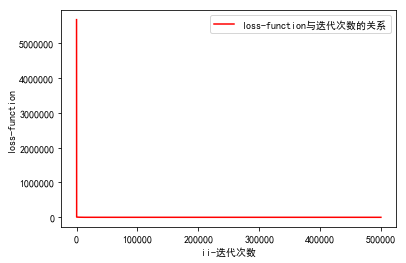

In [213]:
fig, = plot(ii,J,"r-")
legend(handles=[fig], labels=['loss-function与迭代次数的关系'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("ii-迭代次数")
ylabel("loss-function")

loss funciton: 4.179158512456615


Text(0, 0.5, '函数值')

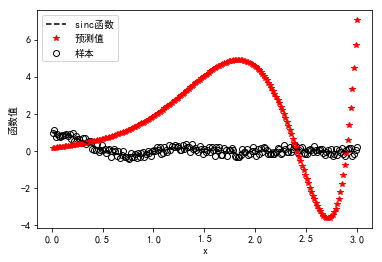

In [214]:
Y_prediction_2=np.dot(X,Theta)
print("loss funciton:",J[-1])
fig2, = plot(x_training,Y_training,'ko',markerfacecolor='none');
fig3, = plot(x_training,Y_prediction_2,'r*')
fig4, = plot(x1,y1,"k--")
legend(handles=[fig4,fig3,fig2], labels=['sinc函数','预测值','样本'],loc='best')           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")

In [238]:
#训练集：
n = []
for k in range(9):
    n.append(k+1)
Error = []
j = 0
iter_number = 500000                       #设置迭代次数
alpha=0.0000001 # 学习率
for i in range(9):
    X = FeatureMapping(x_training,n[j])           #得到数据的Feature mapping, 还没有乘以系数theta
    Theta=np.random.rand(n[j]+1).reshape(n[j]+1,1)      #产生n+1维的特征数二维矩阵（这里是随机的）
    #J = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m
    J = np.empty(iter_number)   #产生空的列向量(1维列表)
    ii = np.empty(iter_number)  #将迭代次数分为一维向量，方便画图
    for h in np.arange(iter_number):    
        Theta = Theta - alpha*np.dot(X.T,(np.dot(X,Theta)-Y_training))/m               #见上公式
        J[h] = np.dot((np.dot(X,Theta)-Y_training).T,np.dot(X,Theta)-Y_training)/2/m            #得到纵坐标误差J的纵坐标
        ii[h]=h                 #产生画图的横坐标-迭代次数
    Y_prediction = np.dot(X,Theta)    #得到预测值
    E = np.dot((np.dot(X,Theta)-Y_training).T,np.dot(X,Theta)-Y_training)/2/m       #算平方误差
    Error.append(E.item())
    j+= 1

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


这里出现红色是因为对于9的时候，误差溢出，由于学习步长太大导致的。

Text(0, 0.5, '误差值')

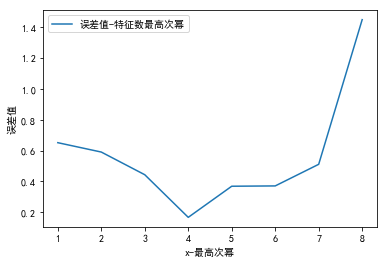

In [239]:
fig5, = plot(n,Error);             #加逗号是为了输出图例
legend(handles=[fig5], labels=['误差值-特征数最高次幂'])           #输出图例
xlabel("x-最高次幂")
ylabel("误差值")

D:\software\anaconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


Text(0, 0.5, '误差值')

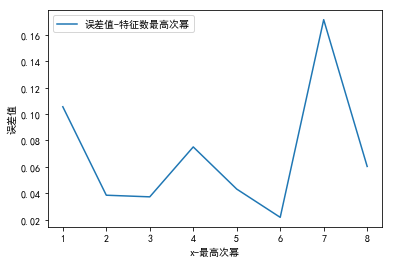

In [251]:
#交叉集
# 固定训练集
np.random.seed(3)      #(每次计算会有相同的样本，前提是编号1相对应)

n = []
for k in range(9):
    n.append(k+1)
Error = []
j = 0
iter_number = 1000000                       #设置迭代次数
alpha=0.0000001 # 学习率
for i in range(9):
    X = FeatureMapping(x_training,n[j])           #得到数据的Feature mapping, 还没有乘以系数theta
    Theta=np.random.rand(n[j]+1).reshape(n[j]+1,1)      #产生n+1维的特征数二维矩阵（这里是随机的）
    #J = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m
    J = np.empty(iter_number)   #产生空的列向量(1维列表)
    ii = np.empty(iter_number)  #将迭代次数分为一维向量，方便画图
    for h in np.arange(iter_number):    
        Theta = Theta - alpha*np.dot(X.T,(np.dot(X,Theta)-Y_training))/m            
        ii[h]=h                 #产生画图的横坐标-迭代次数
    X = FeatureMapping(x_cv,n[j])
    E = np.dot((np.dot(X,Theta)-Y_cv).T,np.dot(X,Theta)-Y_cv)/2/m       #算平方误差
    Error.append(E.item())
    j+= 1
fig5, = plot(n,Error);             #加逗号是为了输出图例
legend(handles=[fig5], labels=['误差值-特征数最高次幂'])           #输出图例
xlabel("x-最高次幂")
ylabel("误差值")

说明训练集还是取3，4，5，6，7训练效果比较好，而交叉集合2,3,6比较好，说明4有轻微过学习, 随机选取一个n，这里取n=3

Text(0, 0.5, 'loss-function')

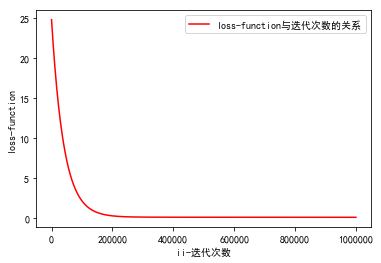

In [246]:
n=3
# 固定训练集
np.random.seed(2)      #(每次计算会有相同的样本，前提是编号1相对应)

alpha=0.0000001 # 学习率

X = FeatureMapping(x_training,n)           #得到数据的Feature mapping, 还没有乘以系数theta
Theta=np.random.rand(n+1).reshape(n+1,1)      #产生n+1维的特征数二维矩阵（这里是随机的）
iter_number = 1000000                       #设置迭代次数
#J = np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/m
J = np.empty(iter_number)   #产生空的列向量(1维列表)
ii = np.empty(iter_number)  #将迭代次数分为一维向量，方便画图
for i in np.arange(iter_number):    
    Theta = Theta - alpha*np.dot(X.T,(np.dot(X,Theta)-Y_training))/m               #见上公式
    J[i] = np.dot((np.dot(X,Theta)-Y_training).T,np.dot(X,Theta)-Y_training)/2/m            #得到纵坐标误差J的纵坐标
    ii[i]=i                 #产生画图的横坐标-迭代次数
fig6, = plot(ii,J,"r-")
legend(handles=[fig6], labels=['loss-function与迭代次数的关系'])           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("ii-迭代次数")
ylabel("loss-function")

loss funciton: 0.06353533051473353


Text(0, 0.5, '函数值')

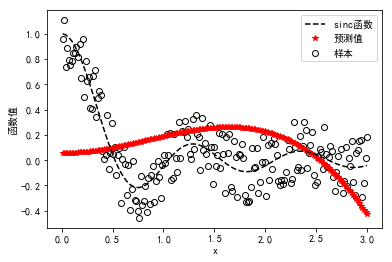

In [235]:
#验证训练集
Y_prediction_3=np.dot(X,Theta)
print("loss funciton:",J[-1])
fig7, = plot(x_training,Y_training,'ko',markerfacecolor='none');
fig8, = plot(x_training,Y_prediction_3,'r*')
fig9, = plot(x1,y1,"k--")
legend(handles=[fig9,fig8,fig7], labels=['sinc函数','预测值','样本'],loc='best')           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")

loss funciton: 0.09799462813714607


Text(0, 0.5, '函数值')

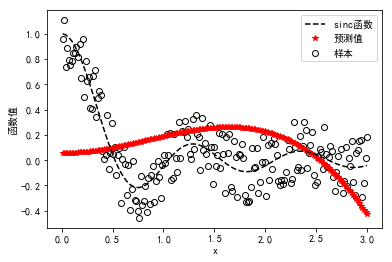

In [247]:
#验证交叉集

X = FeatureMapping(x_cv,n) 
Y_prediction_4=np.dot(X,Theta)
print("loss funciton:",J[-1])
fig7, = plot(x_training,Y_training,'ko',markerfacecolor='none');
fig8, = plot(x_training,Y_prediction_3,'r*')
fig9, = plot(x1,y1,"k--")
legend(handles=[fig9,fig8,fig7], labels=['sinc函数','预测值','样本'],loc='best')           #输出图例
#legend(handles=[fig1,fig2,fig3], labels=['sinc','fitting result','data'])
xlabel("x")
ylabel("函数值")

此时学习效果非常好，交叉集的误差比训练集还要小，说明普适性更好。